**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Load Dataset**

In [2]:
df = pd.read_csv('/content/world_population.csv')

Filter Five Countries

In [3]:
countries = ['Afghanistan', 'Brazil', 'Canada', 'Denmark', 'Egypt']
subset = df[df['Country/Territory'].isin(countries)].reset_index(drop=True)
subset = subset.sort_values('2022 Population', ascending=False)

**BAD Pie Chart**

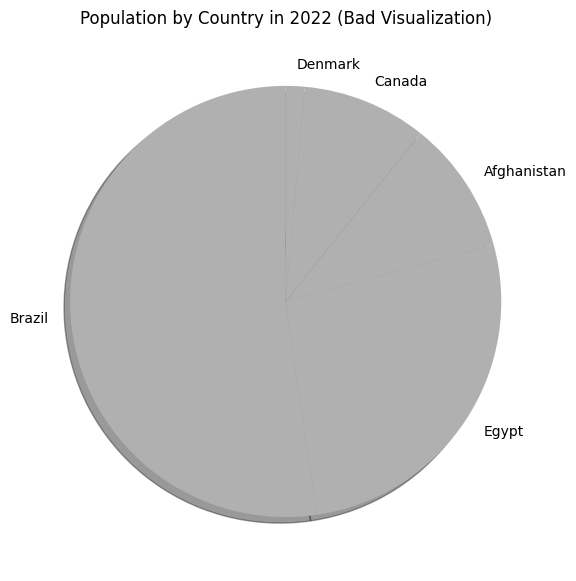

In [4]:
plt.figure(figsize=(7,7))
colors_bad = ['#b0b0b0'] * len(subset)
plt.pie(subset['2022 Population'], colors=colors_bad, labels=subset['Country/Territory'], startangle=90, shadow=True)
plt.title('Population by Country in 2022 (Bad Visualization)')
plt.show()

**GOOD Bar Chart**

<ipython-input-5-389c13e8a756>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Territory', y='2022 Population', data=subset, palette='viridis')


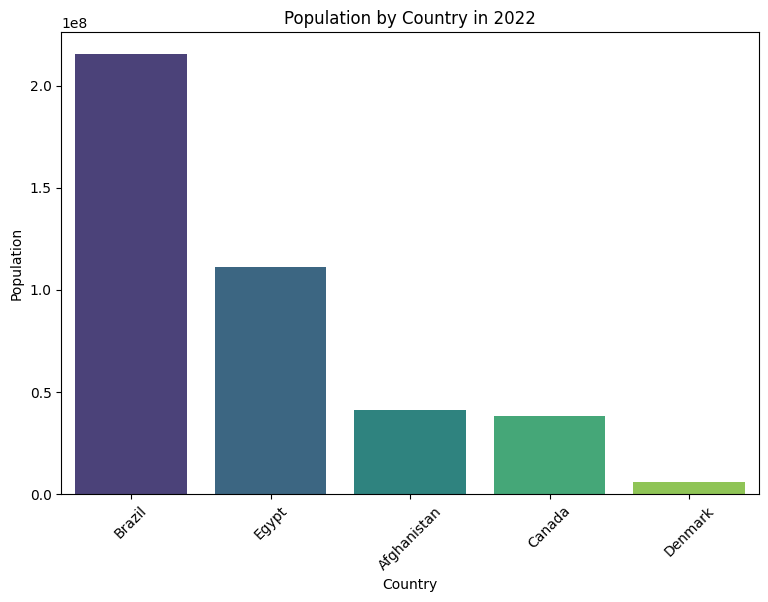

In [5]:
plt.figure(figsize=(9,6))
sns.barplot(x='Country/Territory', y='2022 Population', data=subset, palette='viridis')
plt.title('Population by Country in 2022')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

**GOOD Line Chart**

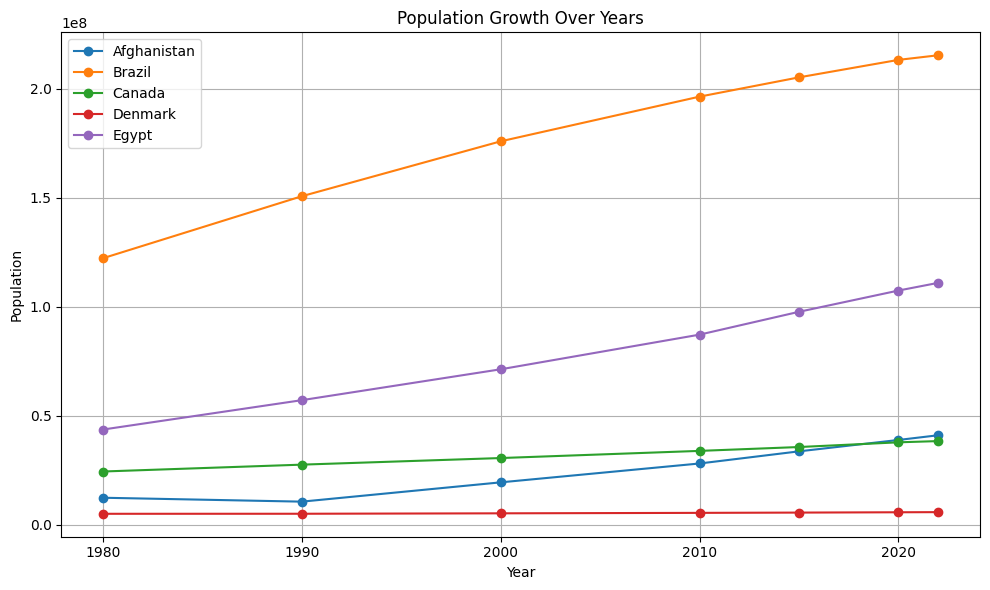

In [6]:
plt.figure(figsize=(10,6))
years = ['1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
for country in countries:
    country_data = subset[subset['Country/Territory'] == country][years].values.flatten()
    plt.plot([1980,1990,2000,2010,2015,2020,2022], country_data, marker='o', label=country)

plt.title('Population Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**PLOTLY Choropleth Map**

In [7]:
map_df = subset[['Country/Territory', '2022 Population']]
map_df = map_df.rename(columns={'Country/Territory': 'Country'})

fig = px.choropleth(map_df,
                    locations="Country",
                    locationmode='country names',
                    color="2022 Population",
                    color_continuous_scale="Viridis",
                    title="2022 Population by Country (Choropleth Map)")
fig.show()


**PLOTLY Bubble Map**

In [8]:
fig = px.scatter_geo(map_df,
                     locations="Country",
                     locationmode="country names",
                     size="2022 Population",
                     color="Country",
                     title="Bubble Map of 2022 Population",
                     projection="natural earth")
fig.show()

**PLOTLY Animated Choropleth**

In [9]:
long_df = pd.melt(subset,
                  id_vars=['Country/Territory'],
                  value_vars=years,
                  var_name='Year',
                  value_name='Population')

long_df['Year'] = long_df['Year'].str.extract('(\d+)').astype(int)
long_df = long_df.rename(columns={'Country/Territory': 'Country'})

fig = px.choropleth(long_df,
                    locations="Country",
                    locationmode="country names",
                    color="Population",
                    animation_frame="Year",
                    color_continuous_scale="Plasma",
                    title="Animated Global Population Over Time")
fig.show()